 <center><img src="../img/logo.png" alt="logo empresa" height="200"> </center>
<center><h1>Project:“AUTO MOTORS”</h1></center>
<center><p> Analyze the impact of the pandemic in this company</p></center>

In [4]:
import pandas as pd 
import seaborn as sns

In [5]:
ventas = pd.read_csv("data/Ventas.csv", sep=";")
empleados = pd.read_csv("data/Empleados.csv", sep=";")

/home/dm/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (0,1,2,4,5,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
ventas.head()


,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,1/9/2016,24.0,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1,129310,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,1/9/2016,14.0,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2,181034,Suba,Suba,32.0
2,C2865810,PINEDA JAIME,1/9/2016,12.0,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1,193095,Usaquen,Santa ana,33.0
3,C11210285,VILLALBA RODRIGUEZ FABIO,1/9/2016,24.0,LL-TCA-0009,ENERGY XM2 165/65R13,101.0,LLANTA,2,262069,Puente aranda,Calle 13,35.0
4,C80755314,MOLINA RONALD,1/9/2016,14.0,LL-TCA-0132,NO UTILIZAR,101.0,LLANTA,4,362069,Suba,Suba,32.0


In [7]:
empleados.head()

,Id_Empleado,Nombre y Apellido
0,1,Juan Pastran
1,2,Esteban Damico
2,3,Julian Quevedo
3,4,Oscar Rosseto
4,5,Valentin Quintero


In [8]:
ventas.shape, empleados.shape

((1048575, 13), (68, 2))

<center><h1>1. CLEANING</h1></center>


IdCliente        921320
NombreCliente    921320
Fecha            921320
Empleado         921320
Referencia       921320
Descripcion      921320
CodigoFamilia    921320
Familia          921320
Cantidad         921320
Ventas           921320
Localidad        921320
Sede             921319
Area             921320
dtype: int64


<AxesSubplot: >

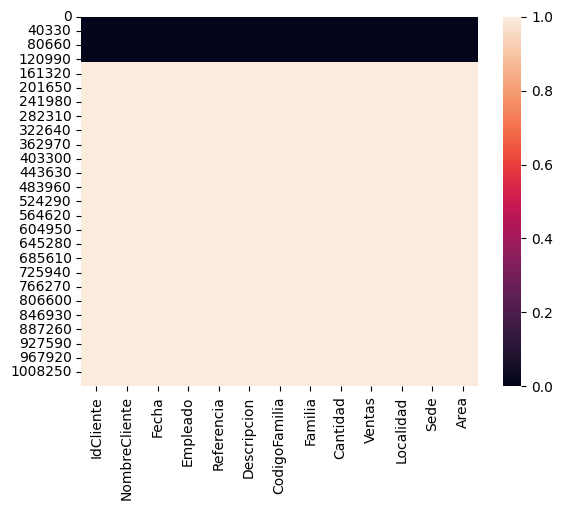

In [9]:
print(ventas.isnull().sum())
sns.heatmap(ventas.isnull()) 

Id_Empleado          0
Nombre y Apellido    0
dtype: int64


<AxesSubplot: >

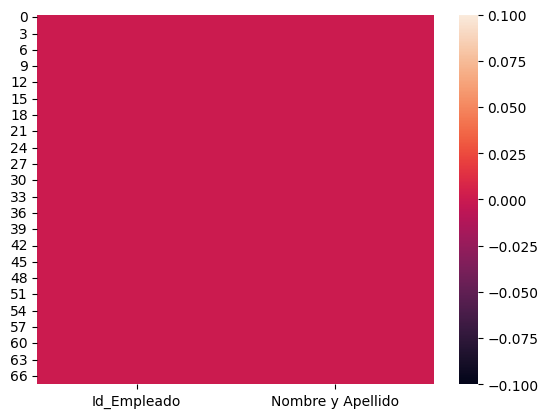

In [10]:
print(empleados.isnull().sum())
sns.heatmap(empleados.isnull())

In [11]:
ventastotal = ventas.isnull().sum().sort_values(ascending=False)
ventastotal_per = ventastotal/len(ventas)*100
ventastotal_per

IdCliente        87.864006
NombreCliente    87.864006
Fecha            87.864006
Empleado         87.864006
Referencia       87.864006
Descripcion      87.864006
CodigoFamilia    87.864006
Familia          87.864006
Cantidad         87.864006
Ventas           87.864006
Localidad        87.864006
Area             87.864006
Sede             87.863911
dtype: float64

In [12]:
#we can see that in the sales csv, the null values ​​correspond to raws without any information in main data set,
#they do not contain null values ​​between them, we proceed to eliminate the empty fields
ventas.dropna(inplace = True)

IdCliente        0
NombreCliente    0
Fecha            0
Empleado         0
Referencia       0
Descripcion      0
CodigoFamilia    0
Familia          0
Cantidad         0
Ventas           0
Localidad        0
Sede             0
Area             0
dtype: int64


<AxesSubplot: >

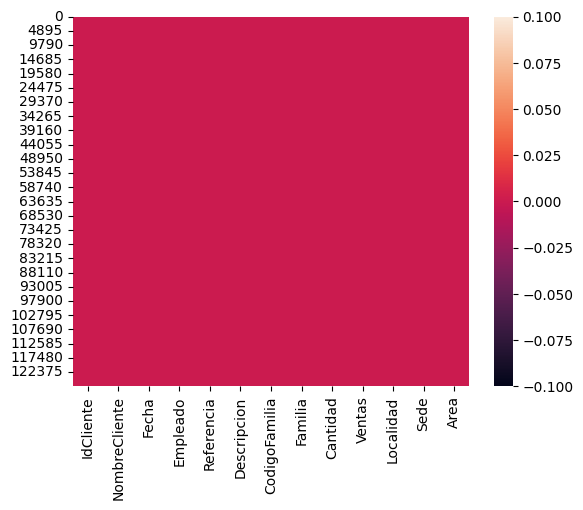

In [13]:
#Cheking 
print(ventas.isnull().sum())
sns.heatmap(ventas.isnull())

 <center><img src="https://d1csarkz8obe9u.cloudfront.net/posterpreviews/warning-symbol%2C-warning-sign-design-template-5becb2f6646d14a8076b36a92efb1db8_screen.jpg?ts=1609018489
" alt="logo empresa" height="50" style="border-radius:30%;"></center>

<center><h3>ATENCIÓN</h3></center>

<h4>Analyzing the data proposed in the PDF versus the dataset received, we see conclusions provided by the company, the first one being that the dataset contained a 87% of missing values versus the index, the company should be informed if this is due to bad export or data collection before continuing to tackle the problem, assuming for further teaching that it is a non-critical fault due to an error and the sales data is all there, we proceed to keep treating it.</h4>

<center><h1>2. Treatment</h1></center>


<center>For this project we must manage in US dollars for the reports , we make the corresponding conversion.</center>

In [15]:
#The conversion must be performed in the Sales column, it is in Colombian currency this must be converted to US Dollars. First we check the current exchange rate.
import yfinance as yf
#How many Colombian pesos is one dollar?
Dollar = yf.download("COP=X", period="1d", interval="1d")
print(Dollar)
print(*Dollar['Close'].values)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-02-14  4829.049805  4829.049805  4829.049805  4829.049805  4829.049805   

            Volume  
Date                
2023-02-14       0  
4829.0498046875


In [16]:
#Check the type of the Sales column.
ventas.dtypes

IdCliente         object
NombreCliente     object
Fecha             object
Empleado         float64
Referencia        object
Descripcion       object
CodigoFamilia    float64
Familia           object
Cantidad          object
Ventas            object
Localidad         object
Sede              object
Area             float64
dtype: object

In [17]:
#float conversion 
ventas["Ventas"] = ventas["Ventas"].str.replace(",00","") #Lo que hacemos es eliminar la coma y los dos ceros seguidos 
ventas["Ventas"] = ventas["Ventas"].str.replace(".","")  #quitamos el punto decimal
ventas["Ventas"] = ventas["Ventas"].astype("float") #y por ultimo, damos formato a decimal

/tmp/ipykernel_126859/1026585482.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ventas["Ventas"] = ventas["Ventas"].str.replace(".","")  #quitamos el punto decimal


In [18]:
#Considering the closing value, we change the values of the Sales column.
ventas["Ventas"] = ventas["Ventas"].apply(lambda x:x/4749.1298828125)

In [19]:
#Checking changes
ventas["Ventas"].describe()

count    127255.000000
mean        123.150521
std         684.626986
min           0.027373
25%           2.654170
50%           6.193134
75%          10.891258
max       46371.568358
Name: Ventas, dtype: float64

Now we are going to add each employee name from the employee dataset to the sales dataset, in the Employee column where the id is equal.

In [20]:
empleados.head()

,Id_Empleado,Nombre y Apellido
0,1,Juan Pastran
1,2,Esteban Damico
2,3,Julian Quevedo
3,4,Oscar Rosseto
4,5,Valentin Quintero


In [21]:
#Change the values of the employee column to integers.
ventas["Empleado"] = ventas["Empleado"].astype("int")

In [22]:
print(empleados.duplicated().sum() ,ventas.duplicated().sum() ) #Check for duplicate fields.

0 18461


In [23]:
#Remove duplicates
ventas.drop_duplicates(inplace = True)   


In [24]:
#Let's create a dictionary where the key is the employee ID and the value is their name.
Dic = {}

def Diccionario(Empleado):
    Dic[Empleado["Id_Empleado"]] = (Empleado["Nombre y Apellido"])
    return Dic

empleados.apply(Diccionario, axis=1)
Dic

{1: 'Juan Pastran',
 2: 'Esteban Damico',
 3: 'Julian Quevedo',
 4: 'Oscar Rosseto',
 5: 'Valentin Quintero',
 6: 'Marcelo Barrios',
 7: 'Jorge Brizuela',
 8: 'Cristian Chena',
 9: 'Marco Delgado',
 10: 'Adrian Lucero',
 11: 'Omar Pacheco',
 12: 'Marcos Luna',
 13: 'Franco Castro',
 14: 'Javier Garay',
 15: 'Lucas Regalado',
 16: 'Alejo Alfaro',
 17: 'Thiago Manrique',
 18: 'Mateo Quiroga',
 19: 'Alan Silvan',
 20: 'Gonzalo Valdez',
 21: 'Espinoza Duilio',
 22: 'Montaña Ariel',
 23: 'Pedraza Atilio',
 24: 'Tello German',
 25: 'Villlegas Pablo',
 26: 'Fabricio Brizuela',
 27: 'Emir Gimenez',
 28: 'Yair Muñoz',
 29: 'Mathiel Perizo',
 30: 'Etian Aballay',
 31: 'Joaquín Grecco',
 32: 'Isaías Alfaro',
 33: 'Ignacio Pinto',
 34: 'Lian Ruiz',
 35: 'Ian Acosta',
 36: 'Luis Barquiel',
 37: 'Catriel Gonzalez',
 38: 'Lionel Pastran',
 39: 'Tiziano Silva',
 40: 'Gian Cabrera',
 41: 'Pelaytat Axel',
 42: 'Julián Soria',
 43: 'Liam Arancibia',
 44: 'Juan Casivar',
 45: 'Nicolas Castro',
 46: 'Dylan

In [25]:
#Now in our Sales dataframe, we make the Employee column contain the name according to the dictionary.
ventas['Empleado'] = ventas['Empleado'].map(Dic)
ventas.head()

,IdCliente,NombreCliente,Fecha,Empleado,Referencia,Descripcion,CodigoFamilia,Familia,Cantidad,Ventas,Localidad,Sede,Area
0,C1070956433,PINTO JOHN,1/9/2016,Tello German,LL-2R-0038,PILOT STREET 110/80-17,101.0,LLANTA,1,27.228146,Puente aranda,Calle 13,35.0
1,C1032372566,CESAR CRUZ,1/9/2016,Javier Garay,LL-TCA-0133,TOURING 175/70R13,101.0,LLANTA,2,38.119404,Suba,Suba,32.0
2,C2865810,PINEDA JAIME,1/9/2016,Marcos Luna,LL-TCA-0019,ENERGY XM2 185/65R14,101.0,LLANTA,1,40.659027,Usaquen,Santa ana,33.0
3,C11210285,VILLALBA RODRIGUEZ FABIO,1/9/2016,Tello German,LL-TCA-0009,ENERGY XM2 165/65R13,101.0,LLANTA,2,55.182530,Puente aranda,Calle 13,35.0
4,C80755314,MOLINA RONALD,1/9/2016,Javier Garay,LL-TCA-0132,NO UTILIZAR,101.0,LLANTA,4,76.239018,Suba,Suba,32.0


In [26]:
ventas["Fecha"] =pd.to_datetime(ventas["Fecha"]) # convert string to datetime

In [27]:
ventas.to_csv("ventas_updated.csv")#generate a new .csv file


<div style="display:flex; flex-direction:row;">
  <div style="flex:1;">
  <center>
    <img src="http://www.idforideas.com/img/logo.png" alt="imagen1" style="background-color:white;border-radius:50%"; height="100" width="100">
        <a href="https://www.idforideas.com/" target="_blank"><p>Specials Thanks </br> IDFORIDEAS </p></a>
        </center>
  </div>
  <div style="flex:1;">
  <center>
 <img src="https://maia.run/wp-content/uploads/2023/01/Logotipo-Completo-Horizontal-MAIA-DIAPO-BLANCO-RGB-e1674195347476-768x251.png" alt="imagen1"  height="100">
        <a href="https://www.maia.run" target="_blank"><p>Mastering Artificial Intelligence Administration</p></a>
        </center>
  </div>
    <div style="flex:1;">
  <center>
 <img src="https://maia.run/wp-content/uploads/2022/12/Emblema-MAIA-DIAPO-BLANCO-RGB-150x150.png" alt="imagen1"  height="100" width="100">
        <a href="https://www.maiacorp.us" target="_blank"><p>MAIACorp, Wyoming, USA</p></a>
        </center>
</div>